In [1]:
from keras.models import load_model
import numpy as np
import csv

In [2]:
def reduce(train_x):
    # Zaman piramidi, veri dizilerinin uzunluğunun 8'e bölünebilmesini gerektirir.
    # Orijinal uzunluk 100 zaman adımıydı, bu nedenle 104 zaman adımlı dizileri 
    # elde etmek için ilk ve son 2 veri vektörünü tekrarlayacağız.
    train_x = np.concatenate((train_x[:2,:], train_x, train_x[-3:-1,:]), axis = 0)
    
    # Veri uzunluğunu 2, 4 ve 8 kat azaltın
    # İndirgenmiş diziler, zamansal piramit alt ağına girdi olarak kullanılacaktır
    train_x_2 = np.zeros((int(train_x.shape[0]/2), train_x.shape[1]))
    train_x_4 = np.zeros((int(train_x.shape[0]/4), train_x.shape[1]))
    train_x_8 = np.zeros((int(train_x.shape[0]/8), train_x.shape[1]))
    train_x_2 = train_x[::2,:]
    train_x_4 = train_x[::4,:]
    train_x_8 = train_x[::8,:]
    
    def reorder_data(x):
        # Kinect'ten alınan 88 boyutlu iskelet verilerini gövde, sol kol, sağ kol, sol bacak 
        #ve sağ bacağa yeniden sıralamak için kod
        X_trunk = np.zeros((x.shape[1],16))
        X_left_arm = np.zeros((x.shape[1],16))
        X_right_arm = np.zeros((x.shape[1],16))
        X_left_leg = np.zeros((x.shape[1],16))
        X_right_leg = np.zeros((x.shape[1],16))
        X_trunk =  x[np.newaxis,:,0:16]
        X_left_arm = x[np.newaxis,:,16:32]
        X_right_arm = x[np.newaxis,:,32:48]
        X_left_leg = x[np.newaxis,:,48:64]
        X_right_leg = x[np.newaxis,:,64:80]
        x_segmented = np.concatenate((X_trunk, X_right_arm, X_left_arm, X_right_leg, X_left_leg),axis = -1)
        return x_segmented
    
    # Veri boyutlarını beş vücut parçasına karşılık gelecek şekilde yeniden sıralayın
    return [reorder_data(train_x), reorder_data(train_x_2), reorder_data(train_x_4), reorder_data(train_x_8)]

## Yazarın düzenlemiş olduğu veriler ile

In [3]:
model = load_model("deneme")

In [4]:
f = open('Data_KIMORE_e5/Train_X.csv')
csv_f = csv.reader(f)
trainx = list(csv_f)

print(np.shape(trainx))

# Girdi dizilerini numpy dizilerine dönüştürün
train_input1 = np.asarray(trainx, dtype = float)
n_dim = 88
X_train = np.zeros((204,100,n_dim))
for i in range(len(train_input1)//100):
    X_train[i,:,:] = train_input1[100*i:100*(i+1),:]

f = open('Data_KIMORE_e5/Train_Y.csv')
csv_f = csv.reader(f)
trainy = list(csv_f)

# Girdi etiketlerini numpy dizilerine dönüştürün
Y_train = np.transpose(np.asarray(trainy[0], dtype = float))

print("X_train\nshape: ", np.shape(X_train), "\ntype: ", type(X_train), 
      "\n\nY_train\nshape: ", np.shape(Y_train), "\ntype: ", type(Y_train))

print("\nY_train :\n", Y_train[0], "\n\nX_train:\n", X_train[0])

(20400, 88)
X_train
shape:  (204, 100, 88) 
type:  <class 'numpy.ndarray'> 

Y_train
shape:  (204,) 
type:  <class 'numpy.ndarray'>

Y_train :
 0.96667 

X_train:
 [[-0.01554   -0.0088553  0.98467   ...  0.         0.         0.       ]
 [-0.016076  -0.0085983  0.98471   ...  0.         0.         0.       ]
 [-0.016639  -0.0082737  0.98476   ...  0.         0.         0.       ]
 ...
 [-0.016513  -0.011378   0.98356   ...  0.         0.         0.       ]
 [-0.016734  -0.011354   0.98357   ...  0.         0.         0.       ]
 [-0.017172  -0.011282   0.98361   ...  0.         0.         0.       ]]


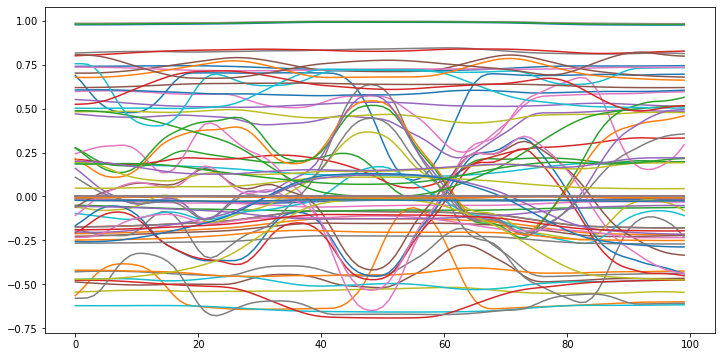

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (12,6))
plt.plot(X_train[0])
plt.show()

In [6]:
train_x = reduce(X_train[0])

In [7]:
print(np.shape(train_x[0]), np.shape(train_x[1]), np.shape(train_x[2]), np.shape(train_x[3]))

(1, 104, 80) (1, 52, 80) (1, 26, 80) (1, 13, 80)


In [8]:
model.predict(train_x)

array([[0.9735155]], dtype=float32)

In [9]:
Y_train[0]

0.96667

## Kimore veri setinden raw olarak alınmış veri ile

In [12]:
import csv
f = open('1.csv')
csv_f = csv.reader(f)
x = list(csv_f)

n_dim = 88

# csv dosyasının başında bulunan boş dizeleri silin
while x[0] == []:
    del x[0]

# dizenin sonundaki boş verileri silin
for i in range(0,len(x)):       
    while len(x[i]) > n_dim:
        x[i].pop()

# Girdi dizilerini numpy dizilerine dönüştürün
train_input1 = np.asarray(x, dtype = float)

train_input = np.zeros((100,n_dim))
for i in range(len(train_input1)//10):
     train_input[i,:] = train_input1[10*(i+1),:]

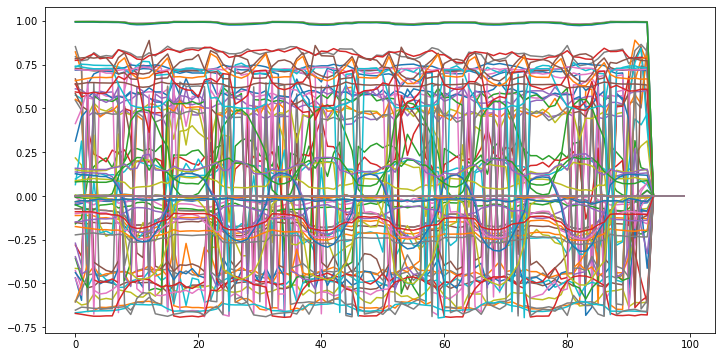

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,6))
plt.plot(train_input)
plt.show()

In [14]:
train_x = reduce(train_input)

In [15]:
print(np.shape(train_x[0]), np.shape(train_x[1]), np.shape(train_x[2]), np.shape(train_x[3]))

(1, 104, 80) (1, 52, 80) (1, 26, 80) (1, 13, 80)


In [16]:
model.predict(train_x)

array([[0.92002857]], dtype=float32)

## 4 boyuta indirgenmiş veri ile

In [15]:
f = open('Autoencoder_Output_Correct.csv')
csv_f = csv.reader(f)
trainx = list(csv_f)

# Convert the input sequences into numpy arrays
train_input1 = np.asarray(trainx, dtype = float)
n_dim = 4
X_train = np.zeros((204,100,n_dim))
for i in range(len(train_input1)//100):
    X_train[:,:,i] = train_input1[:,100*i:100*(i+1)]

f = open('Data_KIMORE_e5/Train_Y.csv')
csv_f = csv.reader(f)
trainy = list(csv_f)

# Convert the input labels into numpy arrays
y_train = np.transpose(np.asarray(trainy[0], dtype = float))

In [16]:
'''
Trains a spatio-temporal NN model on deep squat movement from the KIMORE dataset acquired with Kinect v2 sensor
For a detailed explanation of the data and the model please see the article
'''

from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.models import Model
from keras.layers import Input, Conv1D, LSTM, Dense, Dropout, Activation, Flatten, concatenate, UpSampling1D
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.layers import Lambda
from keras.models import load_model

import matplotlib.pyplot as plt
%matplotlib inline

import datetime
now = datetime.datetime.now
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from math import sqrt

# length of data sequences
seq_len = 104
# dimension of data sequences
n_dim = 400
batch_size = 2

In [17]:
X_train = np.concatenate((X_train[:,:2,:], X_train, X_train[:,-3:-1,:]), axis = 1)

print('Training sequences dimension', X_train.shape)
print('Testing labels dimension', y_train.shape)

Training sequences dimension (204, 104, 4)
Testing labels dimension (204,)


In [18]:
# Split the data into training and validation sets
train_x, valid_x, train_y, valid_y = train_test_split(X_train, y_train, test_size=0.3)
print('Training data', train_x.shape)
print('Validation data', valid_x.shape)

Training data (142, 104, 4)
Validation data (62, 104, 4)


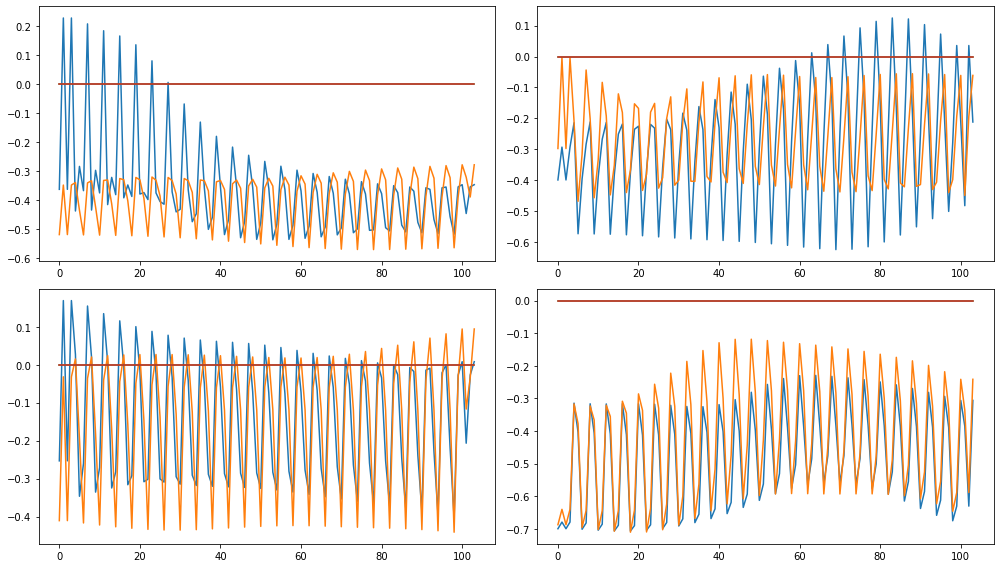

In [19]:
# Plot the first and last sequences in the training and validation data
plt.figure(figsize = (14,8))
plt.subplot(2,2,1)
plt.plot(train_x[0])
plt.subplot(2,2,2)
plt.plot(train_x[-1])
plt.subplot(2,2,3)
plt.plot(valid_x[0])
plt.subplot(2,2,4)
plt.plot(valid_x[-1])
plt.tight_layout()
plt.show()

In [20]:
train_x_2 = np.zeros((train_x.shape[0], int(train_x.shape[1]/2), train_x.shape[2]))
valid_x_2 = np.zeros(train_x_2.shape)
train_x_4 = np.zeros((train_x.shape[0], int(train_x.shape[1]/4), train_x.shape[2]))
valid_x_4 = np.zeros(train_x_4.shape)
train_x_8 = np.zeros((train_x.shape[0], int(train_x.shape[1]/8), train_x.shape[2]))
valid_x_8 = np.zeros(train_x_8.shape)
train_x_2 = train_x[:,::2,:]
valid_x_2 = valid_x[:,::2,:]
train_x_4 = train_x[:,::4,:]
valid_x_4 = valid_x[:,::4,:]
train_x_8 = train_x[:,::8,:]
valid_x_8 = valid_x[:,::8,:] 

In [21]:
# Code to re-order the 88 dimensional skeleton data from Kinect into trunk, left arm, right arm, left leg and right leg
def reorder_data(x):
    X_trunk = np.zeros((x.shape[0],x.shape[1],1))
    X_left_arm = np.zeros((x.shape[0],x.shape[1],1))
    X_right_arm = np.zeros((x.shape[0],x.shape[1],1))
    X_left_leg = np.zeros((x.shape[0],x.shape[1],1))
    X_right_leg = np.zeros((x.shape[0],x.shape[1],1))
    X_trunk =  x[:,:,0:2]
    X_left_arm = x[:,:,2:3]
    X_right_arm = x[:,:,2:3]
    X_left_leg = x[:,:,3:4]
    X_right_leg = x[:,:,3:4]
    x_segmented = np.concatenate((X_trunk, X_right_arm, X_left_arm, X_right_leg, X_left_leg), axis = -1)
    print(np.shape(X_trunk), np.shape(X_right_arm), np.shape(X_left_arm), np.shape(X_right_leg), np.shape(X_left_leg))
    return x_segmented

In [22]:
# Reorder the data dimensions to correspond to the five body parts
trainx =  reorder_data(train_x)
validx =  reorder_data(valid_x)
trainx_2 =  reorder_data(train_x_2)
validx_2 =  reorder_data(valid_x_2)
trainx_4 =  reorder_data(train_x_4)
validx_4 =  reorder_data(valid_x_4)
trainx_8 =  reorder_data(train_x_8)
validx_8 =  reorder_data(valid_x_8)

(142, 104, 2) (142, 104, 1) (142, 104, 1) (142, 104, 1) (142, 104, 1)
(62, 104, 2) (62, 104, 1) (62, 104, 1) (62, 104, 1) (62, 104, 1)
(142, 52, 2) (142, 52, 1) (142, 52, 1) (142, 52, 1) (142, 52, 1)
(62, 52, 2) (62, 52, 1) (62, 52, 1) (62, 52, 1) (62, 52, 1)
(142, 26, 2) (142, 26, 1) (142, 26, 1) (142, 26, 1) (142, 26, 1)
(62, 26, 2) (62, 26, 1) (62, 26, 1) (62, 26, 1) (62, 26, 1)
(142, 13, 2) (142, 13, 1) (142, 13, 1) (142, 13, 1) (142, 13, 1)
(62, 13, 2) (62, 13, 1) (62, 13, 1) (62, 13, 1) (62, 13, 1)


In [23]:
print(np.shape(validx), np.shape(validx_2), np.shape(validx_4), np.shape(validx_8))

(62, 104, 6) (62, 52, 6) (62, 26, 6) (62, 13, 6)


In [24]:
# Çok dallı evrişimli Inception-like bir blok tanımlayın
def MultiBranchConv1D(input, filters1, kernel_size1, strides1, strides2):
    x1 = Conv1D(filters=filters1, kernel_size=kernel_size1+2, strides=strides1, padding='same', activation='relu')(input)
    x1 = Dropout(0.25)(x1)
    x2 = Conv1D(filters=filters1, kernel_size=kernel_size1+6, strides=strides1, padding='same', activation='relu')(input)
    x2 = Dropout(0.25)(x2)
    x3 = Conv1D(filters=filters1, kernel_size=kernel_size1+12, strides=strides1, padding='same', activation='relu')(input)
    x3 = Dropout(0.25)(x3)
    y1 = concatenate([x1, x2, x3], axis=-1)

    x4 = Conv1D(filters=filters1, kernel_size=kernel_size1, strides=strides2, padding='same', activation='relu')(y1)
    x4 = Dropout(0.25)(x4)
    x5 = Conv1D(filters=filters1, kernel_size=kernel_size1+2, strides=strides2, padding='same', activation='relu')(y1)
    x5 = Dropout(0.25)(x5)
    x6 = Conv1D(filters=filters1, kernel_size=kernel_size1+4, strides=strides2, padding='same', activation='relu')(y1)
    x6 = Dropout(0.25)(x6)
    x = concatenate([x4, x5, x6], axis=-1)                                                                                                                                   
    return x

In [25]:
# Define a temporal pyramid network
def TempPyramid(input_f, input_2, input_4, input_8, seq_len, n_dims):
    
    #### Full scale sequences
    conv1 = MultiBranchConv1D(input_f, 64, 3, 2, 2)

    #### Half scale sequences
    conv2 = MultiBranchConv1D(input_2, 64, 3, 2, 1)

    #### Quarter scale sequences
    conv3 = MultiBranchConv1D(input_4, 64, 3, 1, 1)

    #### Eighth scale sequences
    conv4 = MultiBranchConv1D(input_8, 64, 3, 1, 1)
    upsample1 = UpSampling1D(size = 2)(conv4)

    #### Recurrent layers
    x = concatenate([conv1, conv2, conv3, upsample1], axis=-1)
    return x  

In [26]:
n_dim = 6 # verileri vücut bölümlerine göre yeniden sıraladıktan sonra boyut
n_dim1 = 16 # bireysel vücut parçalarının boyutu

# Build the model ...

#### Full scale sequences
seq_input = Input(shape = (seq_len,n_dim), name = 'full_scale')

seq_input_trunk = Lambda(lambda x: x[:, :, 0:2])(seq_input)
seq_input_left_arm = Lambda(lambda x: x[:, :, 2:3])(seq_input)
seq_input_right_arm = Lambda(lambda x: x[:, :, 2:3])(seq_input)
seq_input_left_leg = Lambda(lambda x: x[:, :, 3:4])(seq_input)
seq_input_right_leg = Lambda(lambda x: x[:, :, 3:4])(seq_input)

#### Half scale sequences
seq_input_2 = Input(shape=(int(seq_len/2), n_dim), name='half_scale')

seq_input_trunk_2 = Lambda(lambda x: x[:, :, 0:2])(seq_input_2)
seq_input_left_arm_2 = Lambda(lambda x: x[:, :, 2:3])(seq_input_2)
seq_input_right_arm_2 = Lambda(lambda x: x[:, :, 2:3])(seq_input_2)
seq_input_left_leg_2 = Lambda(lambda x: x[:, :, 3:4])(seq_input_2)
seq_input_right_leg_2 = Lambda(lambda x: x[:, :, 3:4])(seq_input_2)

#### Quarter scale sequences
seq_input_4 = Input(shape=(int(seq_len/4), n_dim), name='quarter_scale')

seq_input_trunk_4 = Lambda(lambda x: x[:, :, 0:2])(seq_input_4)
seq_input_left_arm_4 = Lambda(lambda x: x[:, :, 2:3])(seq_input_4)
seq_input_right_arm_4 = Lambda(lambda x: x[:, :, 2:3])(seq_input_4)
seq_input_left_leg_4 = Lambda(lambda x: x[:, :, 3:4])(seq_input_4)
seq_input_right_leg_4 = Lambda(lambda x: x[:, :, 3:4])(seq_input_4)

#### Eighth scale sequences
seq_input_8 = Input(shape=(int(seq_len/8), n_dim), name='eighth_scale')

seq_input_trunk_8 = Lambda(lambda x: x[:, :, 0:2])(seq_input_8)
seq_input_left_arm_8 = Lambda(lambda x: x[:, :, 2:3])(seq_input_8)
seq_input_right_arm_8 = Lambda(lambda x: x[:, :, 2:3])(seq_input_8)
seq_input_left_leg_8 = Lambda(lambda x: x[:, :, 3:4])(seq_input_8)
seq_input_right_leg_8 = Lambda(lambda x: x[:, :, 3:4])(seq_input_8)

concat_trunk = TempPyramid(seq_input_trunk, seq_input_trunk_2, seq_input_trunk_4, seq_input_trunk_8, seq_len, n_dim1)
concat_left_arm = TempPyramid(seq_input_left_arm, seq_input_left_arm_2, seq_input_left_arm_4, seq_input_left_arm_8, seq_len, n_dim1)
concat_right_arm = TempPyramid(seq_input_right_arm, seq_input_right_arm_2, seq_input_right_arm_4, seq_input_right_arm_8, seq_len, n_dim1)
concat_left_leg = TempPyramid(seq_input_left_leg, seq_input_left_leg_2, seq_input_left_leg_4, seq_input_left_leg_8, seq_len, n_dim1)
concat_right_leg = TempPyramid(seq_input_right_leg, seq_input_right_leg_2, seq_input_right_leg_4, seq_input_right_leg_8, seq_len, n_dim1)

concat = concatenate([concat_trunk, concat_left_arm, concat_right_arm, concat_left_leg, concat_right_leg], axis=-1)

rec = LSTM(80, return_sequences=True)(concat)
rec1 = LSTM(40, return_sequences=True)(rec)
rec1 = LSTM(40, return_sequences=True)(rec1)
rec2 = LSTM(80)(rec1)

out = Dense(1, activation = 'sigmoid')(rec2)

model = Model(inputs=[seq_input, seq_input_2, seq_input_4, seq_input_8], outputs=out)

model.compile(loss='binary_crossentropy', optimizer= Adam(learning_rate=0.0001)) 


In [27]:
t = now()
    
early_stopping = EarlyStopping(monitor='val_loss', patience = 25)

history = model.fit([trainx, trainx_2, trainx_4, trainx_8], train_y, batch_size=10, epochs=500, verbose=0, 
                validation_data=([validx, validx_2, validx_4, validx_8], valid_y), callbacks = [early_stopping])

print('Training time: %s' % (now() - t))

Training time: 0:16:41.524158


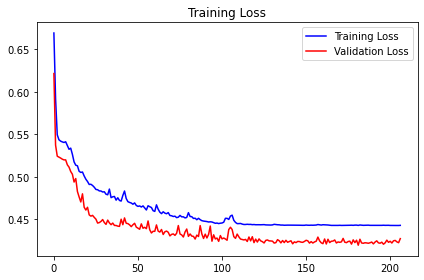

Training loss 0.4427349865436554
Validation loss 0.4195840060710907


In [28]:
# Plot the results
plt.figure(1)
plt.plot(history.history['loss'], 'b', label = 'Training Loss')
plt.title('Training Loss')
plt.plot(history.history['val_loss'], 'r', label = 'Validation Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Print the minimum loss
print("Training loss", np.min(history.history['loss']))
print("Validation loss",np.min(history.history['val_loss']))   

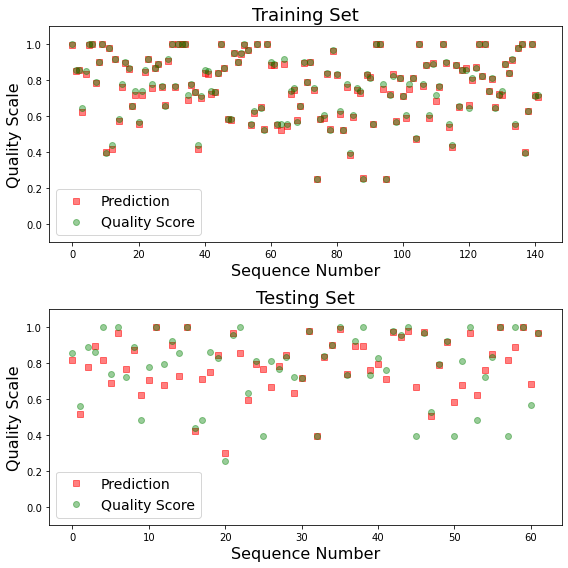

In [29]:
# Plot the prediction of the model for the training and validation sets
pred_train = model.predict([trainx, trainx_2, trainx_4, trainx_8])

pred_test = model.predict([validx, validx_2, validx_4, validx_8])

plt.figure(figsize = (8,8))
plt.subplot(2,1,1)
plt.plot(pred_train,'s', color='red', label='Prediction', linestyle='None', alpha = 0.5, markersize=6)
plt.plot(train_y,'o', color='green',label='Quality Score', alpha = 0.4, markersize=6)
plt.ylim([-0.1,1.1])
plt.title('Training Set',fontsize=18)
plt.xlabel('Sequence Number',fontsize=16)
plt.ylabel('Quality Scale',fontsize=16)
plt.legend(loc=3, prop={'size':14}) # loc:position
plt.subplot(2,1,2)
plt.plot(pred_test,'s', color='red', label='Prediction', linestyle='None', alpha = 0.5, markersize=6)
plt.plot(valid_y,'o', color='green',label='Quality Score', alpha = 0.4, markersize=6)
plt.title('Testing Set',fontsize=18)
plt.ylim([-0.1,1.1])
plt.xlabel('Sequence Number',fontsize=16)
plt.ylabel('Quality Scale',fontsize=16)
plt.legend(loc=3, prop={'size':14}) # loc:position
plt.tight_layout()
plt.show()

In [30]:
# Calculate the cumulative deviation and rms deviation for the validation set
test_dev = abs(np.squeeze(pred_test)-valid_y)
# Cumulative deviation
mean_abs_dev = np.mean(test_dev)
# RMS deviation
rms_dev = sqrt(mean_squared_error(pred_test, valid_y))
print('Mean absolute deviation:', mean_abs_dev)
print('RMS deviation:', rms_dev)

Mean absolute deviation: 0.06660126552320295
RMS deviation: 0.10952320731513387


In [31]:
pred_test = model.predict([validx, validx_2, validx_4, validx_8])

In [49]:
pred_test[8]

array([0.87336224], dtype=float32)

In [48]:
valid_y[8]

0.88667